In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from itertools import combinations
import efficient_apriori
from efficient_apriori import apriori


## Market Basket Analysis (MBA)

pd.set_option('display.max_columns', None)
aisles = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\aisles\aisles.csv')
departments = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\departments\departments.csv')
prod_prior = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\order_products__prior\order_products__prior.csv')
prod_train = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\order_products__train\order_products__train.csv')
orders = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\orders\orders.csv')
products = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\products\products.csv')
sample_sub = pd.read_csv(r'C:\Users\leand\OneDrive\Documentos\FormacaoDSA\f_projeto6\Scripts-06\dados\sample_submission\sample_submission.csv')

In [2]:
## Merge the columns 

prod_prior = prod_prior.merge(orders, on='order_id', how='left')
prod_prior = prod_prior.merge(products, on='product_id', how='left')
prod_prior = prod_prior.merge(aisles, on='aisle_id', how='left')
prod_prior = prod_prior.merge(departments, on='department_id', how='left')

In [3]:
# Usando groupby com agg para criar listas de produtos por order_id
grouped = prod_prior.groupby('order_id')['product_id'].agg(list).reset_index().rename(columns={'order_id': 'ID_Order', 'product_id': 'ID_Product'})



In [4]:
grouped

,ID_Order,ID_Product
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"
...,...,...
3214869,3421079,[30136]
3214870,3421080,"[27845, 4932, 18811, 41950, 31717, 12935, 2512..."
3214871,3421081,"[38185, 12218, 32299, 3060, 20539, 35221, 12861]"
3214872,3421082,"[17279, 12738, 16797, 43352, 32700, 12023, 47941]"


In [5]:

prod_prior

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0,Banana,24,4,fresh fruits,produce


Qual a o número de pedidos mais frequentes entre os usuários?

In [12]:
freq_pedidos = orders.groupby('user_id')['order_number'].agg('max').reset_index()
freq_pedidos = freq_pedidos['order_number'].value_counts()
freq_pedidos.head()

order_number
4    23986
5    19590
6    16165
7    13850
8    11700
Name: count, dtype: int64

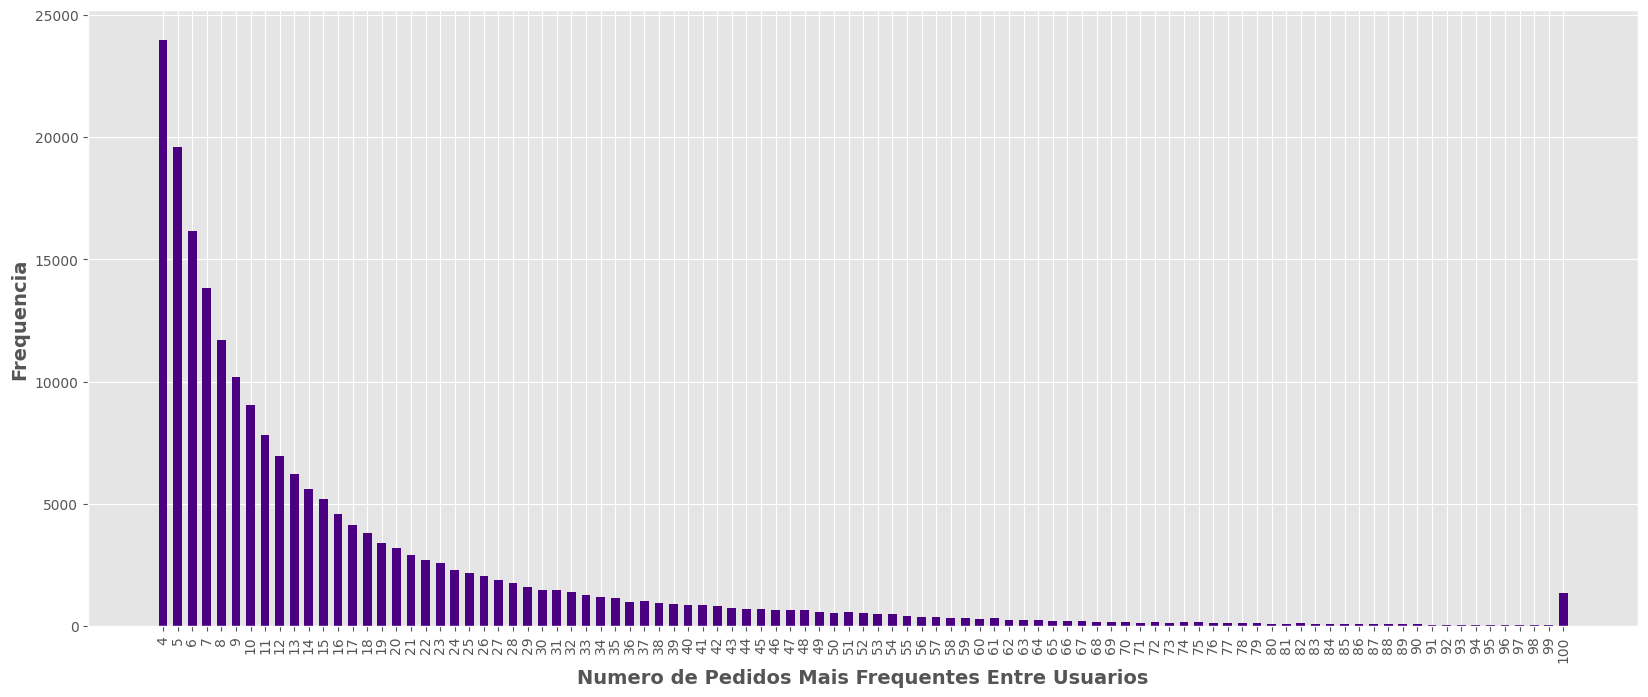

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.bar(freq_pedidos.index, freq_pedidos.values, color='indigo', width=0.6)
plt.xticks(freq_pedidos.index, rotation='vertical')
plt.ylabel('Frequencia', fontsize= 14, fontweight= 'bold')
plt.xlabel('Numero de Pedidos Mais Frequentes Entre Usuarios', fontsize=14, fontweight='bold')
plt.show()

Qual dia da semana tem o maior número de pedidos?

In [31]:
x = list(range(0,7))
y = [orders[orders['order_dow']==0].shape[0],
     orders[orders['order_dow']==1].shape[0],
     orders[orders['order_dow']==2].shape[0],
     orders[orders['order_dow']==3].shape[0],
     orders[orders['order_dow']==4].shape[0],
     orders[orders['order_dow']==5].shape[0],
     orders[orders['order_dow']==6].shape[0]]

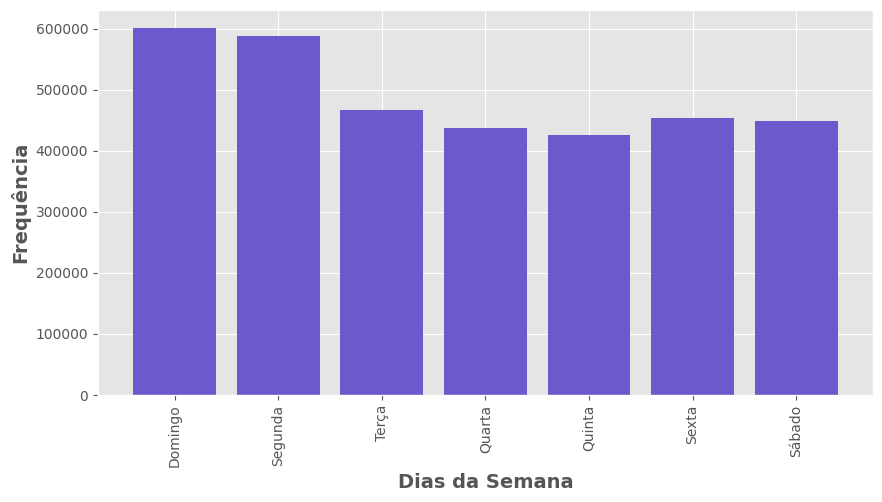

In [32]:
plt.figure(figsize=(10,5))
plt.bar(x,y, color='slateblue')
plt.xlabel('Dias da Semana', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold')
plt.xticks(x,['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'], rotation='vertical')
plt.show()

#Qual hora do dia tem maior número de  pedidos?

In [33]:
x = list(range(0,24))
y = []
for i in range(24):
    y.append(orders[orders['order_hour_of_day']==i].shape[0])

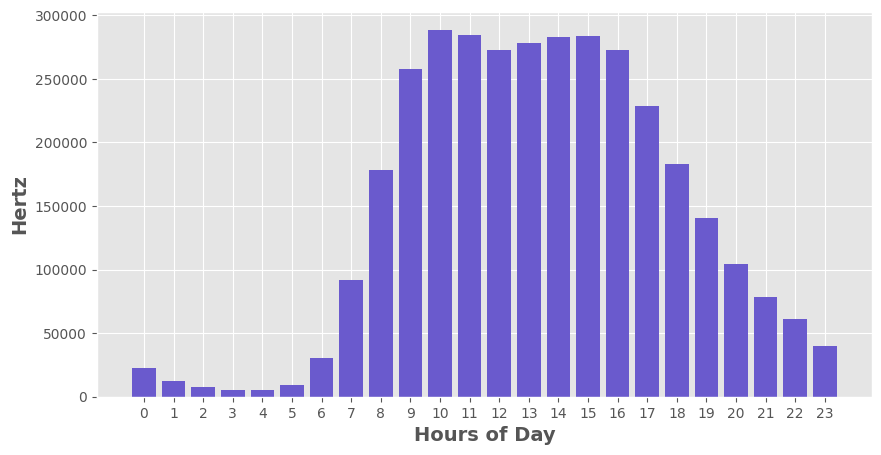

In [37]:
plt.figure(figsize=(10,5))
plt.bar(x, y, color='slateblue') 
plt.xlabel('Hours of Day', fontsize=14, fontweight='bold')
plt.ylabel('Hertz', fontsize=14, fontweight='bold')
plt.xticks(x)
plt.show()

*Qual departamento carrega o maior número de pedidos?

In [40]:
freq_dep = prod_prior['department'].value_counts()

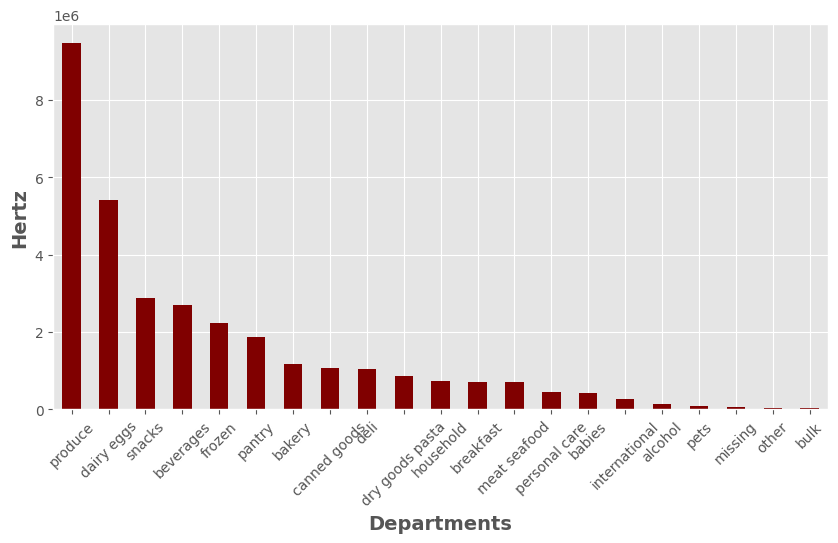

In [42]:
fig = plt.figure(figsize=(20,10))
freq_dep.plot(kind='bar', color='maroon')
plt.xlabel('Departments', fontsize=14, fontweight='bold')
plt.ylabel('Hertz', fontsize=14, fontweight='bold')
plt.xticks( rotation=45)
plt.show()

Quais os 20 principais corredores por frequência de pedidos?

In [46]:
freq_aisles = prod_prior['aisle'].value_counts()

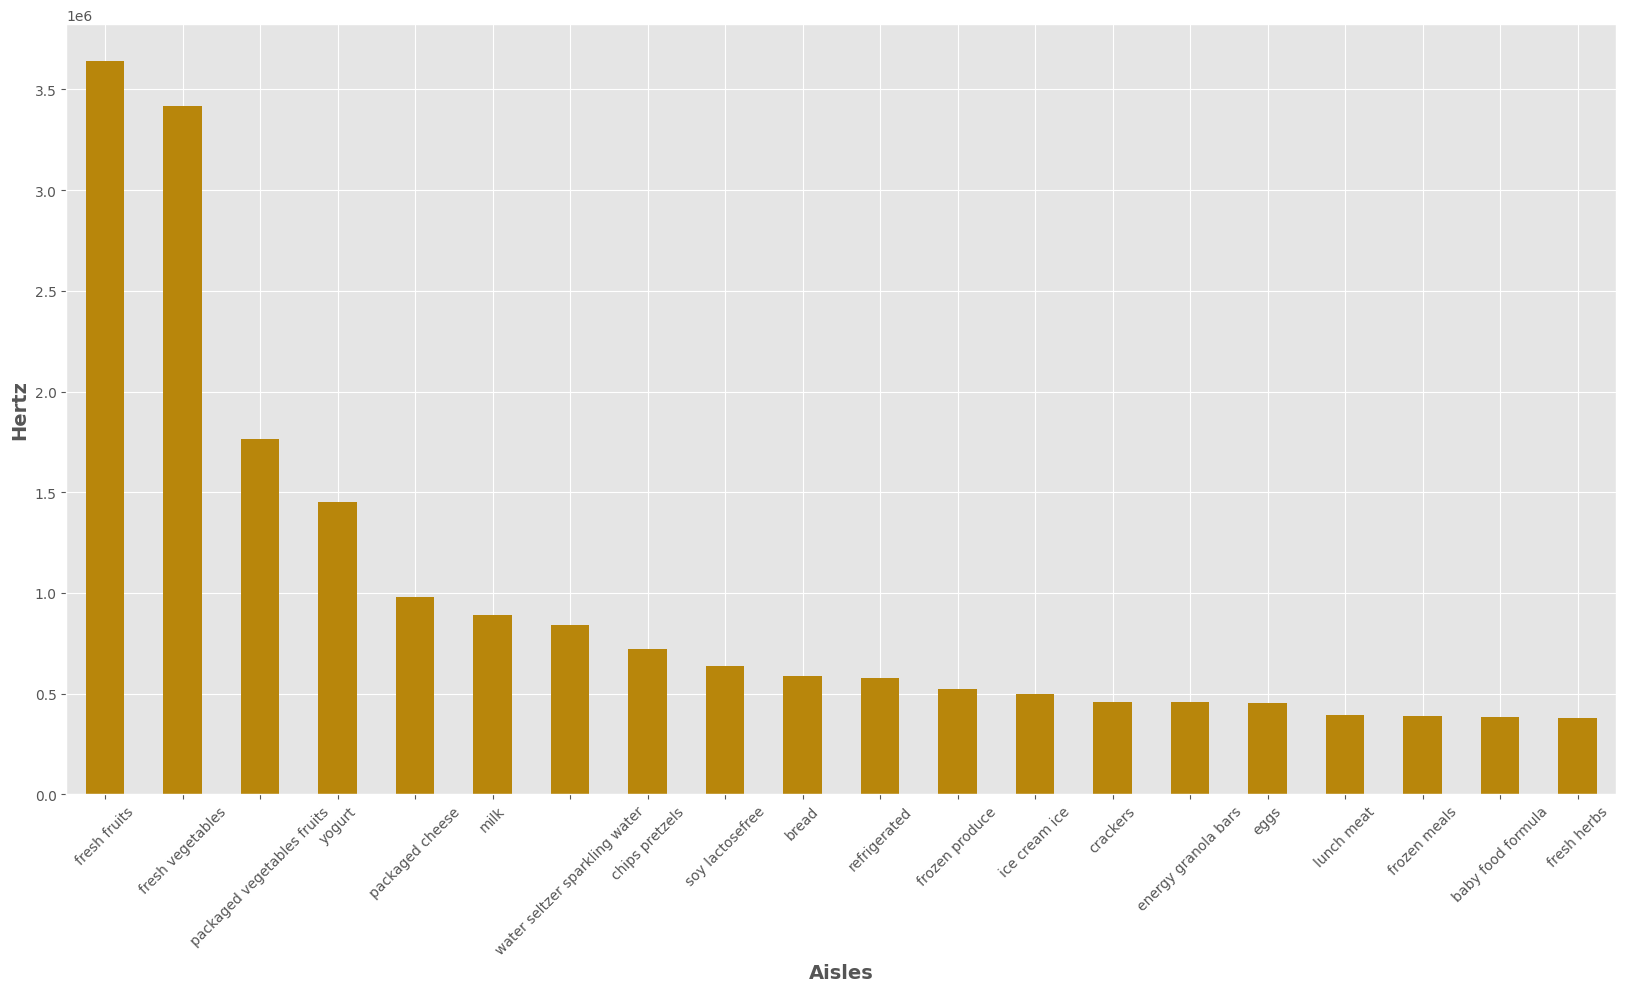

In [47]:
plt.figure(figsize=(20,10))
freq_aisles[0:20].plot(kind='bar', color='darkgoldenrod')
plt.xlabel('Aisles', fontsize=14, fontweight='bold')
plt.ylabel('Hertz', fontsize=14, fontweight='bold')
plt.xticks( rotation=90)
plt.show()